# Life Expectancy (WHO)

## Problem: 
what area(s) should be given importance in order to efficiently improve the life expectancy of the population?

## Business Understanding
Goal: To improve the life expectancy

Objective: To find the factor(s) contributing to lower value of life expectancy

## Analytic Approach: 
Predictive model

## Data Requirement
Dataset related to life expectancy (health, economic, social and other factors affecting the life expectancy) for different countries 

## Data Collection
https://www.kaggle.com/kumarajarshi/life-expectancy-who
The data was collected from WHO and United Nations website for year 2000-2015 for 193 countries for analysis of factors actually affecting the life expectancy. 


In [1]:
# Libraries Import
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error 


In [2]:
# Dataset Import
df = pd.read_csv('../input/life-expectancy-who/Life Expectancy Data.csv')

## Data Understanding

In [3]:
rows, cols = df.shape
print("Records:", rows)

Records: 2938


In [4]:
df.head(rows)                               # view all data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
print('\nLife Expectancy Factors:', cols, list(df.columns))
print('\nNumber of Countries:', len(df['Country'].unique()))
print('\nPeriod: %s - %s'%(min(df['Year']), max(df['Year'])))


Life Expectancy Factors: 22 ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

Number of Countries: 193

Period: 2000 - 2015


In [6]:
df.info()                                   # dtypes and other info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.apply(lambda x: len(x.unique()))         # unique values in dataset

Country                             193
Year                                 16
Status                                2
Life expectancy                     363
Adult Mortality                     426
infant deaths                       209
Alcohol                            1077
percentage expenditure             2328
Hepatitis B                          88
Measles                             958
 BMI                                609
under-five deaths                   252
Polio                                74
Total expenditure                   819
Diphtheria                           82
 HIV/AIDS                           200
GDP                                2491
Population                         2279
 thinness  1-19 years               201
 thinness 5-9 years                 208
Income composition of resources     626
Schooling                           174
dtype: int64

In [8]:
df[df.duplicated()]                         # duplicate rows count

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [9]:
# Missing Values Count & Percentage
null_vals = df.isna().sum().reset_index()
null_vals.columns = ['Factors', 'Missing Values']
null_vals["Missing %"] = round(null_vals['Missing Values']/rows*100, 2)
null_vals[ null_vals['Missing %'] > 0 ]

,Factors,Missing Values,Missing %
3,Life expectancy,10,0.34
4,Adult Mortality,10,0.34
6,Alcohol,194,6.60
8,Hepatitis B,553,18.82
10,BMI,34,1.16
12,Polio,19,0.65
13,Total expenditure,226,7.69
14,Diphtheria,19,0.65
16,GDP,448,15.25
17,Population,652,22.19


### Observations
Records: 2938

Period: 2000 - 2015

Countries: 193

Duplicate rows: 0

Duplicate Columns: 0

Life expectancy factors = 22 = ( Country, Year , Status, Life expectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness  1-19 years,  thinness 5-9 years, Income composition of resource, Schooling)

Status: country status according to WHO standards, Developed or Developing

Life expectancy: life expectancy in age

Adult Mortality: probability of dying between 15 and 60 years per 1000 population

Infant deaths: infant deaths per 1000 population

Alcohol: alcohol consumption rate per capita (15+), measured as liters 

Percentage expenditure: expenditure on health as a percentage of GDP per capita(%)

Hepatitis B: HepB immunization coverage among 1-year-olds (%)

Measles: number of reported cases per 1000 population

BMI: average Body Mass Index of entire population

Under-five deaths: Number of under-five deaths per 1000 population

Polio: Pol3 immunization coverage among 1 year olds (%)

Total expenditure: government expenditure on health as a percentage of total government expenditure (%)

Diphtheria: diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS: deaths per 1000 live births HIV/AIDS (0-4 years)

GDP: Gross Domestic Product per capita (in USD)

Thinness 1-19 years: rate of thinness among people aged 10-19 

Thinness 5-9 years: rate of thinness among people aged 5-9

Income composition of resources: Human Development Index in terms of income composition of resources

Schooling: average number of years of schooling of a population



Thinness 1-19 years should be renamed to Thinness 10-19 years as it represents thinness in people aged 10-19

Polio, Deptheria, Hepatits B and Alcohol should be renamed to Pol3 Vaccination %, Deptheria Vaccination %, HepB Vaccination % and Alcohol Intake(L) respectively to more accurately represent the variables

Column name space issue: Life expectancy, Measles, BMI, under-five deaths, HIV/AIDS, thinness 1-19, thinness 5-9 years, Diphtheria

Column name case issue: Life expectancy, under-five deaths, thinness 1-19, thinness 5-9 years, infant deaths, percentage expenditure, Total expenditure

Column type issue: Country(object), Year(int64), Status(object)

Columns with missing values: Life expectancy(10), Adult Mortality(10), Alcohol Intake(194), HepB Vaccination %(553), BMI(34), Pol3 Vaccination %(19), Total expenditure(226), Diphtheria Vaccination %(19), GDP(448), Population(652), thinness 10-19 years(34), thinness 5-9 years(34), Income composition of resources(167), Schooling(163)

Data isn't normalized

## Data Preprocessing

In [10]:
# Space and Case Correction
df.rename(columns={'Life expectancy ': 'Life Expectancy',
                   'infant deaths': 'Infant Deaths',
                   'percentage expenditure': 'Percentage Expenditure',
                   'Measles ': 'Measles',
                   ' BMI ': 'BMI',
                   'under-five deaths ': 'Under Five Deaths',
                   'Diphtheria ': 'Diphtheria Vaccination %',
                   ' HIV/AIDS': 'HIV/AIDS',
                   ' thinness  1-19 years': 'Thinness 10-19 years',
                   ' thinness 5-9 years': 'Thinness 5-9 years',
                   'Income composition of resources': 'Resources Income Composition',
                   'Total expenditure': 'Total Expenditure',
                   'Polio': 'Pol3 Vaccination %',
                   'Hepatitis B': 'HepB Vaccination %', 
                   'Alcohol': 'Alcohol Intake(L)'
                  },inplace=True)
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol Intake(L)', 'Percentage Expenditure',
       'HepB Vaccination %', 'Measles', 'BMI', 'Under Five Deaths',
       'Pol3 Vaccination %', 'Total Expenditure', 'Diphtheria Vaccination %',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 10-19 years',
       'Thinness 5-9 years', 'Resources Income Composition', 'Schooling'],
      dtype='object')

In [11]:
# Data Formatting
df['Country'] = df['Country'].astype('string')
df['Status'] = df['Status'].astype('string')
df.dtypes

Country                          string
Year                              int64
Status                           string
Life Expectancy                 float64
Adult Mortality                 float64
Infant Deaths                     int64
Alcohol Intake(L)               float64
Percentage Expenditure          float64
HepB Vaccination %              float64
Measles                           int64
BMI                             float64
Under Five Deaths                 int64
Pol3 Vaccination %              float64
Total Expenditure               float64
Diphtheria Vaccination %        float64
HIV/AIDS                        float64
GDP                             float64
Population                      float64
Thinness 10-19 years            float64
Thinness 5-9 years              float64
Resources Income Composition    float64
Schooling                       float64
dtype: object

In [12]:
# Dealing with Missing Values (replacing with mean value for the year)
null_col = ('Life Expectancy', 'Adult Mortality', 'Alcohol Intake(L)', 'HepB Vaccination %', 'BMI', 'Pol3 Vaccination %', 'Total Expenditure', 'Diphtheria Vaccination %', 'GDP', 'Population', 'Thinness 10-19 years', 'Thinness 5-9 years', 'Resources Income Composition', 'Schooling')
data_valid = []
for year in list(df.Year.unique()):
    year_data = df[df.Year == year].copy()
    for col in null_col:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    data_valid.append(year_data)
df = pd.concat(data_valid).copy()
df.isnull().sum(axis = 0)

Country                         0
Year                            0
Status                          0
Life Expectancy                 0
Adult Mortality                 0
Infant Deaths                   0
Alcohol Intake(L)               0
Percentage Expenditure          0
HepB Vaccination %              0
Measles                         0
BMI                             0
Under Five Deaths               0
Pol3 Vaccination %              0
Total Expenditure               0
Diphtheria Vaccination %        0
HIV/AIDS                        0
GDP                             0
Population                      0
Thinness 10-19 years            0
Thinness 5-9 years              0
Resources Income Composition    0
Schooling                       0
dtype: int64

In [13]:
# Label Encoding (transform non-numerical labels to numerical labels)
df['Status'] = LabelEncoder().fit_transform(df['Status'])
df['Status']

0       1
16      1
32      1
48      1
64      1
       ..
2873    1
2889    1
2905    1
2921    1
2937    1
Name: Status, Length: 2938, dtype: int64

In [14]:
# Data Normalization/ Feature Scaling
#df_scale = df.drop(['Country', 'Status', 'Year'], axis='columns')
#df_scale = MinMaxScaler().fit_transform(df_scale)
for col in df.columns:
    if col not in ('Country', 'Status', 'Year'):
        df[col] = df[col] / df[col].max()
df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol Intake(L),Percentage Expenditure,HepB Vaccination %,Measles,...,Pol3 Vaccination %,Total Expenditure,Diphtheria Vaccination %,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Resources Income Composition,Schooling
0,Afghanistan,2015,1,0.730337,0.363762,0.034444,0.000560,0.003659,0.656566,0.005439,...,0.060606,0.463636,0.656566,0.001976,0.004903,0.026074,0.620939,0.604895,0.505274,0.487923
16,Albania,2015,1,0.874157,0.102351,0.000000,0.257415,0.018736,1.000000,0.000000,...,1.000000,0.340909,1.000000,0.001976,0.033181,0.000022,0.043321,0.045455,0.803797,0.685990
32,Algeria,2015,1,0.849438,0.026279,0.011667,0.295934,0.000000,0.959596,0.000297,...,0.959596,0.402273,0.959596,0.001976,0.034679,0.030816,0.216606,0.202797,0.783755,0.695652
48,Angola,2015,1,0.588764,0.463347,0.036667,0.295934,0.000000,0.646465,0.000556,...,0.070707,0.402273,0.646465,0.037549,0.031012,0.002153,0.299639,0.286713,0.560127,0.550725
64,Antigua and Barbuda,2015,1,0.858427,0.017981,0.000000,0.295934,0.000000,1.000000,0.000000,...,0.868687,0.402273,1.000000,0.003953,0.113843,0.008577,0.119134,0.115385,0.827004,0.671498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,Venezuela (Bolivarian Republic of),2000,1,0.814607,0.232365,0.006111,0.448237,0.000000,0.050505,0.000104,...,0.868687,0.278977,0.777778,0.001976,0.039510,0.007296,0.064982,0.059441,0.706751,0.512077
2889,Viet Nam,2000,1,0.824719,0.192254,0.018333,0.089536,0.000000,0.747831,0.077820,...,0.969697,0.277841,0.969697,0.001976,0.039510,0.007296,0.570397,0.573427,0.600211,0.502415
2905,Yemen,2000,1,0.764045,0.348548,0.026667,0.003917,0.000000,0.141414,0.000000,...,0.747475,0.235227,0.747475,0.001976,0.039510,0.007296,0.509025,0.493007,0.459916,0.371981
2921,Zambia,2000,1,0.492135,0.849239,0.024444,0.146614,0.002342,0.747831,0.145770,...,0.858586,0.406818,0.858586,0.369565,0.002869,0.001183,0.270758,0.262238,0.440928,0.463768


In [15]:
# Rounding Float Values to 4 Decimals
for col in df:
    if df[col].dtype in (np.int64, np.float64):
        df[col] = round(df[col], 4)
df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol Intake(L),Percentage Expenditure,HepB Vaccination %,Measles,...,Pol3 Vaccination %,Total Expenditure,Diphtheria Vaccination %,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Resources Income Composition,Schooling
0,Afghanistan,2015,1,0.7303,0.3638,0.0344,0.0006,0.0037,0.6566,0.0054,...,0.0606,0.4636,0.6566,0.0020,0.0049,0.0261,0.6209,0.6049,0.5053,0.4879
16,Albania,2015,1,0.8742,0.1024,0.0000,0.2574,0.0187,1.0000,0.0000,...,1.0000,0.3409,1.0000,0.0020,0.0332,0.0000,0.0433,0.0455,0.8038,0.6860
32,Algeria,2015,1,0.8494,0.0263,0.0117,0.2959,0.0000,0.9596,0.0003,...,0.9596,0.4023,0.9596,0.0020,0.0347,0.0308,0.2166,0.2028,0.7838,0.6957
48,Angola,2015,1,0.5888,0.4633,0.0367,0.2959,0.0000,0.6465,0.0006,...,0.0707,0.4023,0.6465,0.0375,0.0310,0.0022,0.2996,0.2867,0.5601,0.5507
64,Antigua and Barbuda,2015,1,0.8584,0.0180,0.0000,0.2959,0.0000,1.0000,0.0000,...,0.8687,0.4023,1.0000,0.0040,0.1138,0.0086,0.1191,0.1154,0.8270,0.6715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,Venezuela (Bolivarian Republic of),2000,1,0.8146,0.2324,0.0061,0.4482,0.0000,0.0505,0.0001,...,0.8687,0.2790,0.7778,0.0020,0.0395,0.0073,0.0650,0.0594,0.7068,0.5121
2889,Viet Nam,2000,1,0.8247,0.1923,0.0183,0.0895,0.0000,0.7478,0.0778,...,0.9697,0.2778,0.9697,0.0020,0.0395,0.0073,0.5704,0.5734,0.6002,0.5024
2905,Yemen,2000,1,0.7640,0.3485,0.0267,0.0039,0.0000,0.1414,0.0000,...,0.7475,0.2352,0.7475,0.0020,0.0395,0.0073,0.5090,0.4930,0.4599,0.3720
2921,Zambia,2000,1,0.4921,0.8492,0.0244,0.1466,0.0023,0.7478,0.1458,...,0.8586,0.4068,0.8586,0.3696,0.0029,0.0012,0.2708,0.2622,0.4409,0.4638


## Exploratory Data Analysis

In [16]:
df.describe()                              # Statistical Info

,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol Intake(L),Percentage Expenditure,HepB Vaccination %,Measles,BMI,...,Pol3 Vaccination %,Total Expenditure,Diphtheria Vaccination %,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Resources Income Composition,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,0.825732,0.777885,0.227858,0.016841,0.259880,0.037899,0.811346,0.011402,0.438987,...,0.833712,0.341354,0.831372,0.034444,0.062781,0.009856,0.174712,0.170284,0.662117,0.579391
std,4.613841,0.379405,0.106835,0.171623,0.065513,0.219348,0.102050,0.229118,0.054045,0.228286,...,0.235900,0.137286,0.238820,0.100346,0.110421,0.041619,0.158648,0.156739,0.216468,0.157910
min,2000.000000,0.000000,0.407900,0.001400,0.000000,0.000600,0.000000,0.010100,0.000000,0.011500,...,0.030300,0.021000,0.020200,0.002000,0.000000,0.000000,0.003600,0.003500,0.000000,0.000000
25%,2004.000000,1.000000,0.710100,0.102400,0.000000,0.061150,0.000200,0.748500,0.000000,0.222200,...,0.787900,0.248300,0.787900,0.002000,0.004900,0.000300,0.057800,0.055900,0.531875,0.497600
50%,2008.000000,1.000000,0.809000,0.199200,0.001700,0.231700,0.003300,0.878800,0.000100,0.492600,...,0.939400,0.335800,0.939400,0.002000,0.026150,0.002850,0.122700,0.118900,0.709900,0.594200
75%,2012.000000,1.000000,0.849400,0.314000,0.012200,0.413500,0.022675,0.969700,0.001700,0.642600,...,0.979800,0.416500,0.979800,0.015800,0.062600,0.009100,0.256300,0.251700,0.814300,0.681200
max,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# categorical columns & numerical columns
categ_cols = ['Country', 'Status']
numeric_cols = [] 
for i in df.columns:
    if i != 'Status' and df[i].dtype in (np.float64, np.int64):
        numeric_cols.append(i)

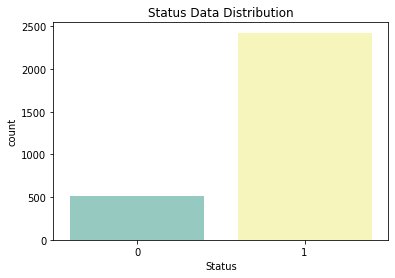

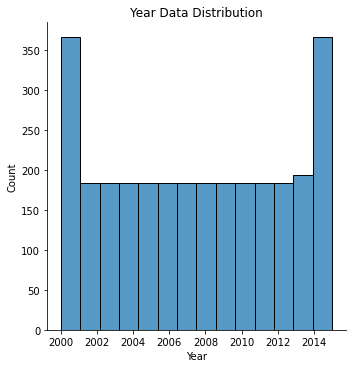

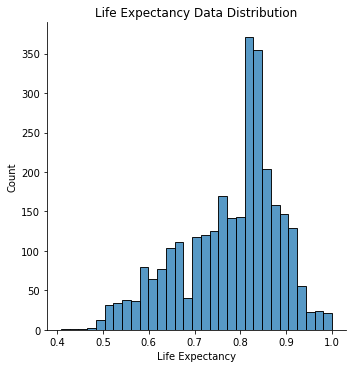

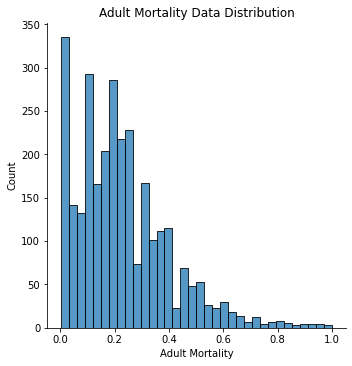

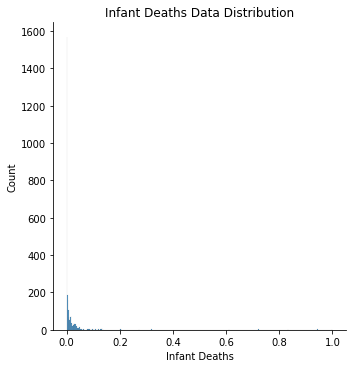

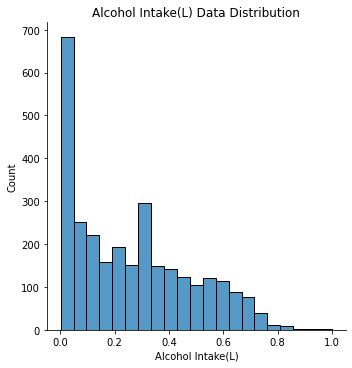

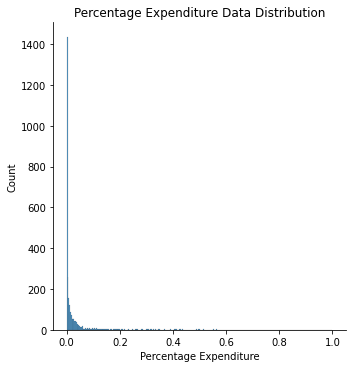

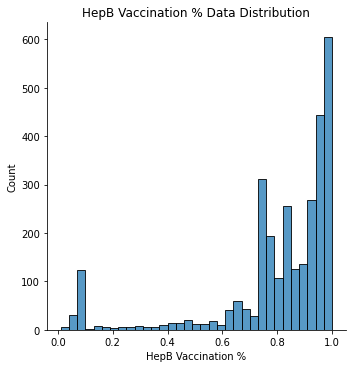

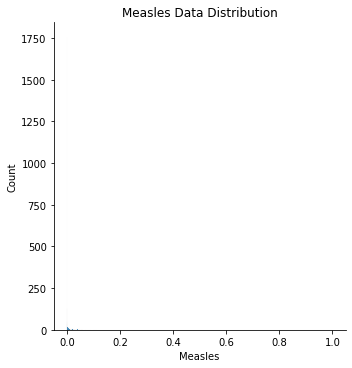

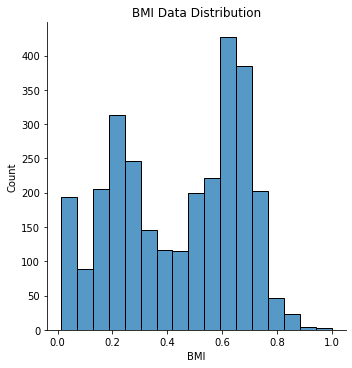

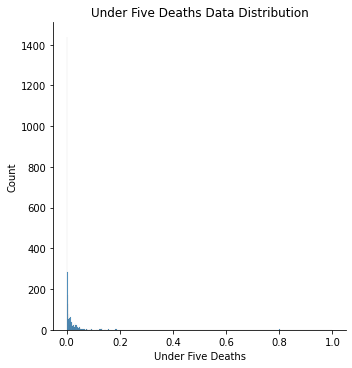

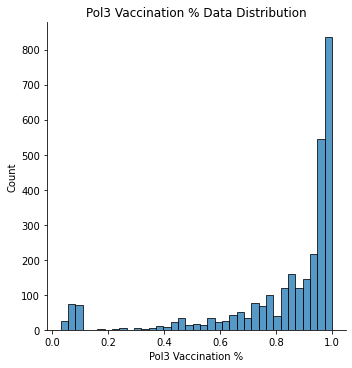

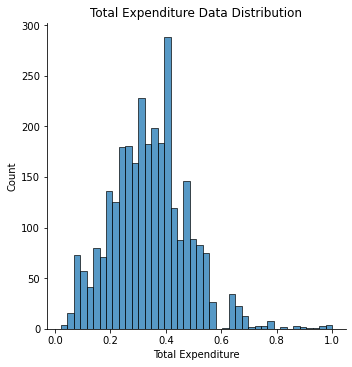

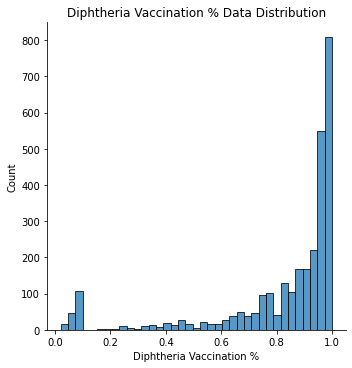

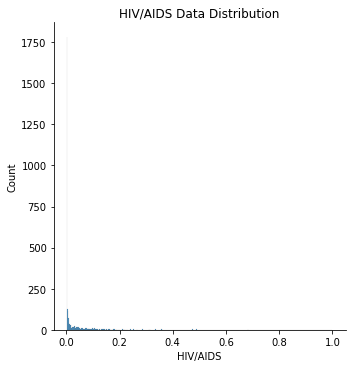

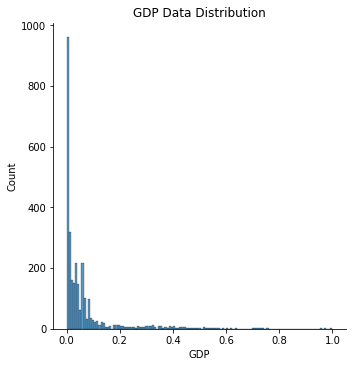

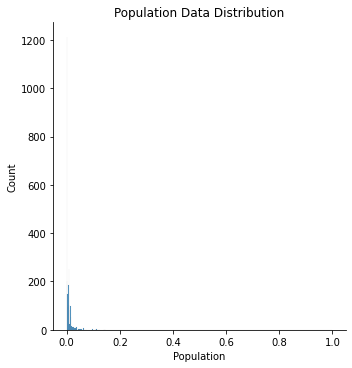

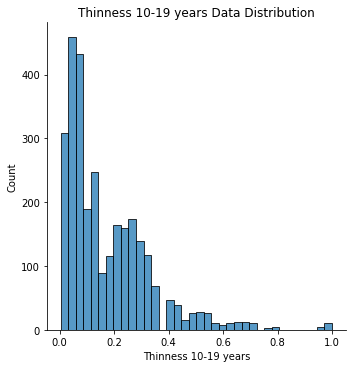

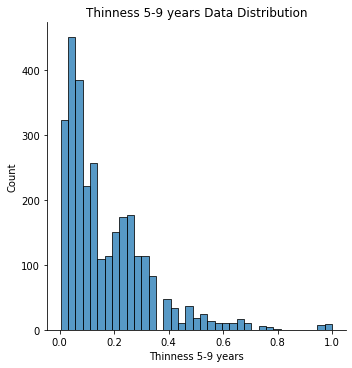

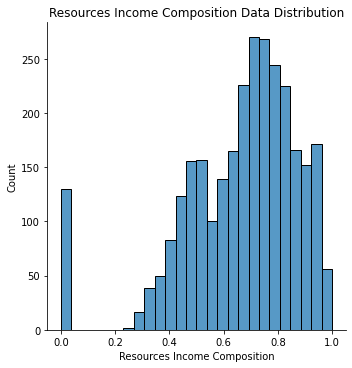

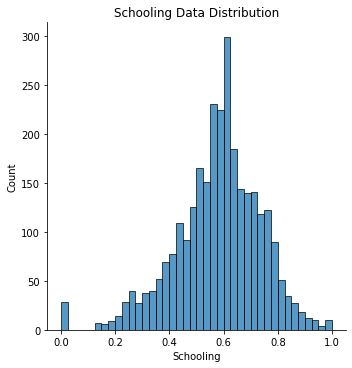

In [18]:
# Data Distribution
plt.rcParams.update({'figure.max_open_warning': 0})
for col in categ_cols:                                             
    sns.countplot(x=col, data=df, dodge=True, palette="Set3")
    plt.title('%s Data Distribution'%col)
plt.show()
for i,col in enumerate(numeric_cols, 1): 
    sns.displot(x=df[col])
    plt.title('%s Data Distribution'%col)
plt.show()

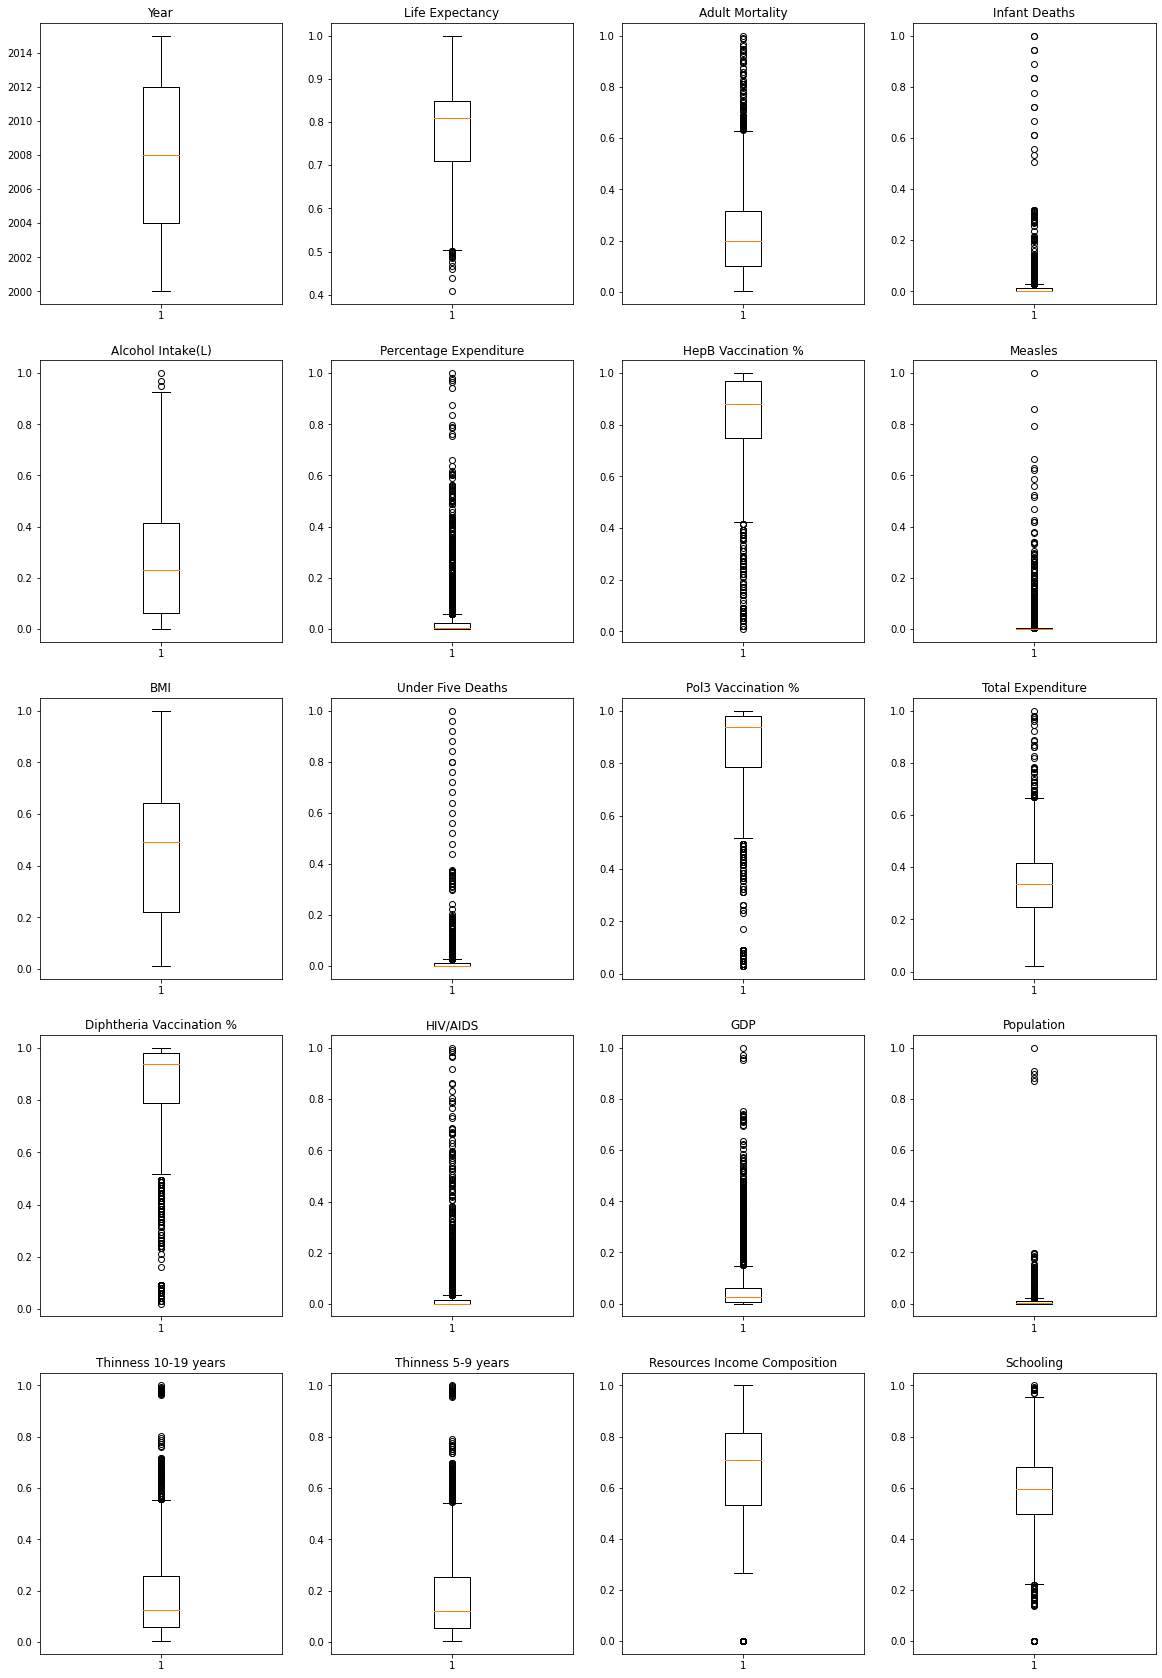

In [19]:
# Outliers 
plt.figure(figsize=(20,30))
for i,col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    plt.boxplot(df[col])
    plt.title(col)
plt.show()

In [20]:
# Outliers Lower & Upper Bound Percentage
percent_low = []
percent_high = []
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (iqr*1.5)
    high = q3 + (iqr*1.5)
    count_l = len(np.where(df[col] < low)[0])
    count_h = len(np.where(df[col] > high)[0])
    percent_low.append(round(count_l/len(df[col])*100, 2))
    percent_high.append(round(count_h/len(df[col])*100, 2))
outlier_table = pd.DataFrame({'Factor':numeric_cols, 'Lower Bound %':percent_low, 'Upper Bound %':percent_high})
outlier_table

,Factor,Lower Bound %,Upper Bound %
0,Year,0.00,0.00
1,Life Expectancy,0.58,0.00
2,Adult Mortality,0.00,2.93
3,Infant Deaths,0.00,11.10
4,Alcohol Intake(L),0.00,0.10
5,Percentage Expenditure,0.00,13.24
6,HepB Vaccination %,7.56,0.00
7,Measles,0.00,18.45
8,BMI,0.00,0.00
9,Under Five Deaths,0.00,13.55


In [21]:
# Handling Outliers as the CORRELATION COEFFICIENT is highly sensitive to outliers

In [22]:
# Effect of Outlier Trimming (remove outlier)
df_test = df.drop(['Country'], axis='columns')
df_test = df_test[~((df_test<low) | (df_test>high)).any(axis=1)]
df_test.shape

(0, 21)

In [23]:
# Winzorization 
for i,col in enumerate(numeric_cols, 1):
    df[col] = winsorize(df[col], (max(percent_low)/100, max(percent_high)/100))      
 

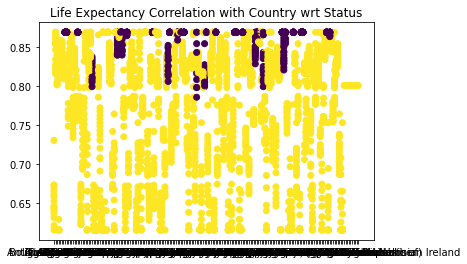

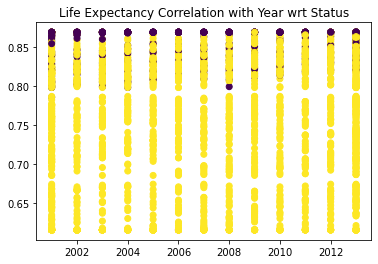

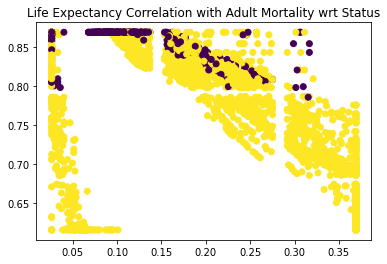

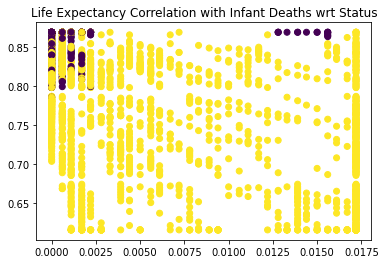

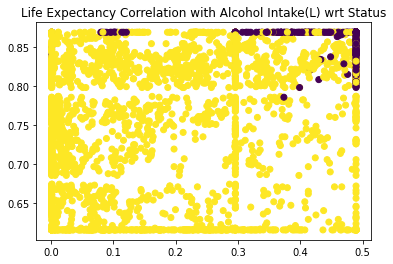

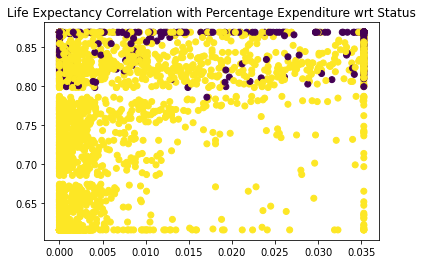

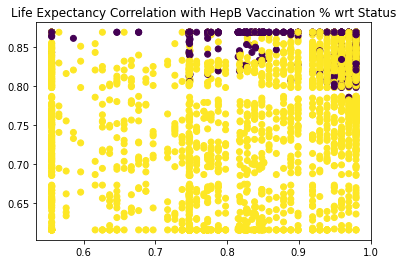

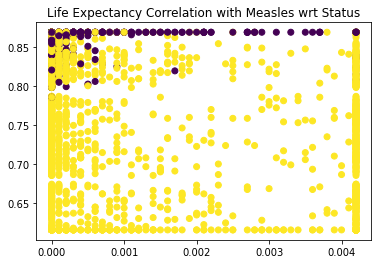

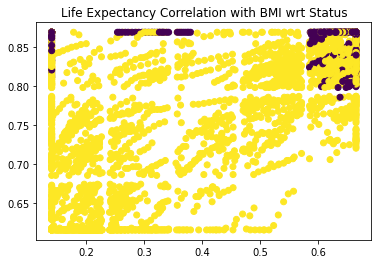

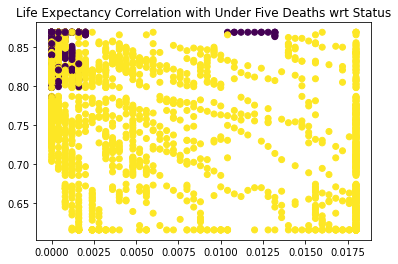

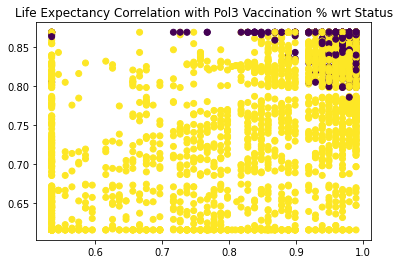

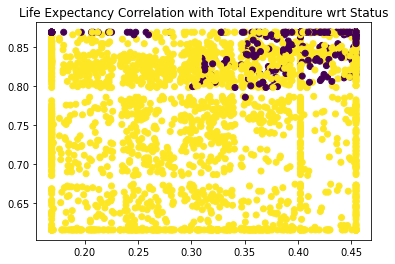

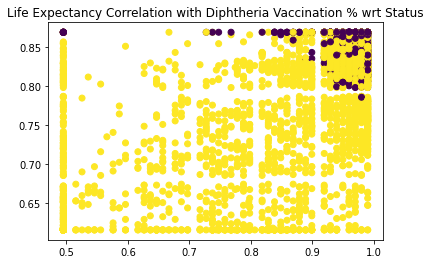

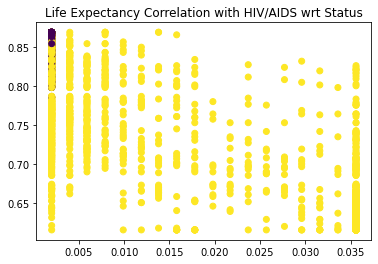

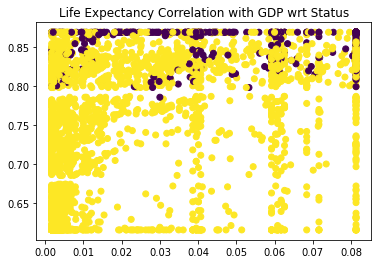

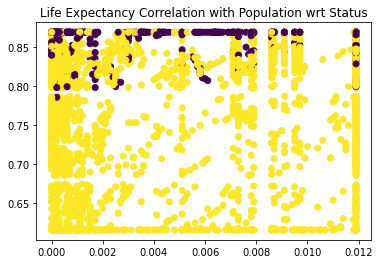

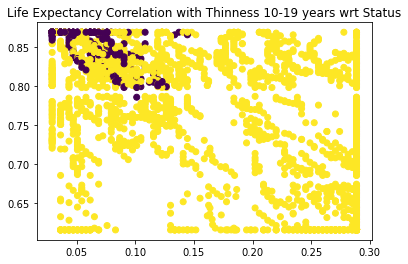

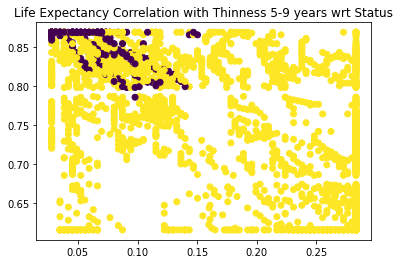

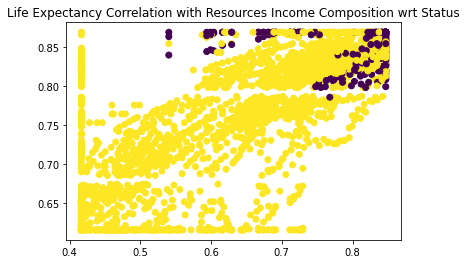

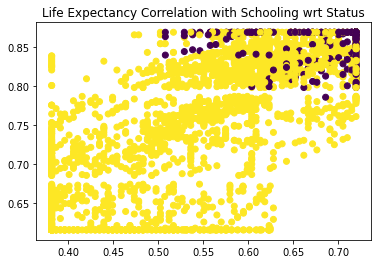

In [24]:
# Life Expectancy Correlation with Other Factors wrt Status
for col in df.columns:
    if col not in ('Life Expectancy', 'Status'):
        plt.scatter(x=df[col], y=df['Life Expectancy'], c=df['Status'], label=df['Status'])
        plt.title('Life Expectancy Correlation with %s wrt Status'%col)
        plt.show()


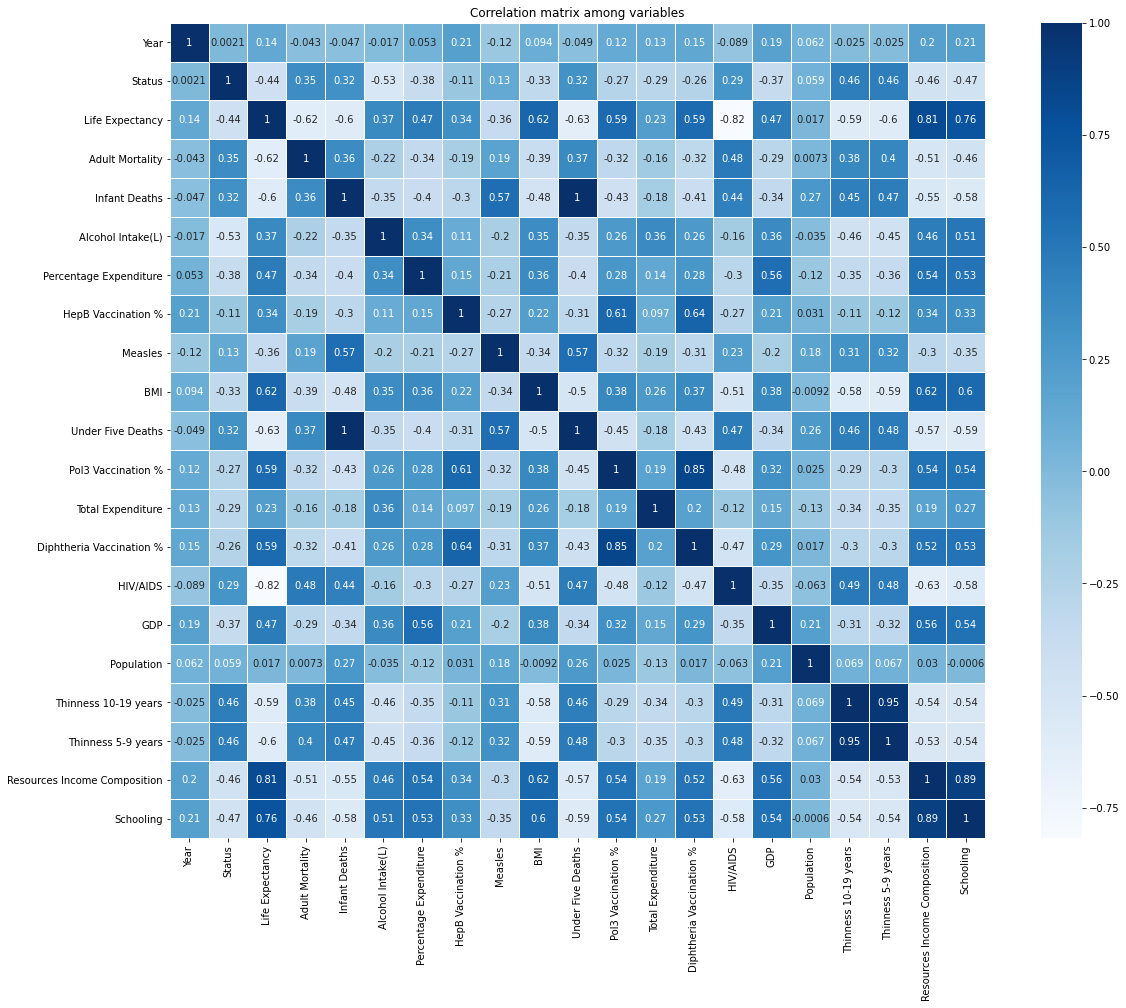

In [25]:
# Correlation Matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5, cmap="Blues")
plt.title("Correlation matrix among variables")
plt.show()

In [26]:
# Correlation Statistics
p_coef, p_val, rel, res = [], [], [], []
y = df['Life Expectancy']
for col in numeric_cols:
    #if col == 'Life Expectancy': continue
    coef, val = pearsonr(df[col], y)
    p_coef.append(coef)
    p_val.append(val)
    if coef > 0:
        if coef > 0.5: rel.append('Strong Positive')
        else: rel.append('Weak Positive')
    elif coef < 0:
        if coef < -0.5: rel.append('Strong Negative')
        else: rel.append('Weak Negative')
    else:
        rel.append('Nil')
    if val < 0.001:
        res.append('Strong')
    elif val < 0.05:
        res.append('Moderate')
    elif val < 0.1:
        res.append('Weak')
    else:
        res.append('Nil')
corelation_table = pd.DataFrame({'Factor':numeric_cols, 'Coefficient':p_coef, 'P-value':p_val, 'Relation':rel, 'Result Certainity':res}) 
corelation_table

,Factor,Coefficient,P-value,Relation,Result Certainity
0,Year,0.136101,1.277727e-13,Weak Positive,Strong
1,Life Expectancy,1.000000,0.000000e+00,Strong Positive,Strong
2,Adult Mortality,-0.618420,1.230419e-309,Strong Negative,Strong
3,Infant Deaths,-0.601669,7.233224e-289,Strong Negative,Strong
4,Alcohol Intake(L),0.374941,1.014254e-98,Weak Positive,Strong
5,Percentage Expenditure,0.469080,1.152566e-160,Weak Positive,Strong
6,HepB Vaccination %,0.339230,4.941471e-80,Weak Positive,Strong
7,Measles,-0.356505,8.988397e-89,Weak Negative,Strong
8,BMI,0.617653,1.169861e-308,Strong Positive,Strong
9,Under Five Deaths,-0.629119,9.881313e-324,Strong Negative,Strong


In [27]:
# Important Variables Extraction
x = df.drop(['Country', 'Year', 'Life Expectancy', 'Population', 'Total Expenditure', 'Alcohol Intake(L)'], 1)

### Observations

There are outliers in the data as stats values for some column don't make sense:

Infant deaths min is 0 per 1000 but Under Five Deaths is not 0

BMI min is 0.01 and max is 1 (lower than 10 and greater than 80)

GDP per capita min is 0

population min is 0

Infant deaths of 0


Columns with outlier % greater than 5: Infant Deaths(11.1), Percentage Expenditure(13.2), HepB Vaccination %(8.9), Measles(18.4), Under Five Deaths(13.5), Pol3 Vaccination %(9.5), HIV/AIDS(18.4), Diptheria Vaccination %(10.1), GDP(12.4), Population(10)


Outliers trimming results in total data loss

Used winzorization for outlier handling


Life Expectancy correlation with other factors:

strong positive: BMI, Schooling and Resources Income Composition, Diptheria Vaccination %, Pol3 Vaccination %

strong negative: Adult Mortality, Thiness 5-9 years, HIV/AIDS, Under Five Deaths, Infant Deaths

weak negative:   HepB Vaccination %, Measles, Thiness 10-19 years, Status(negative because status value 0= developed country and 1=developing)

weak positive:   GDP, Percentage Expenditure, HepB Vaccination %, Alcohol Intake(Positive because alcohol is consumed more in developed countries and developed countries has high life expectancy)

negligible:      Year, Total Expenditure, Population 



Result certainity is strong for all factors except Population

Importants Factors: BMI, Schooling, Resources Income Composition, Diptheria Vaccination %, Pol3 Vaccination %, Adult Mortality, Thiness 5-9 years, HIV/AIDS, Under Five Deaths, Infant Deaths

Unimportant Factors: Country, Year, Infant Deaths, Total Expenditure, Population, Alcohol Intake


## Model Development 

In [28]:
# Dataset Splitting into Training & Test Sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [29]:
# Model Development
lm = LinearRegression().fit(x_train, y_train)
pred_train = lm.predict(x_train)
pred_test = lm.predict(x_test)

## Model Evaluation

In [30]:
# Mean Squared Error & Mean Absolute Error
mse_train = round(mean_squared_error(y_train, pred_train), 4)
mse_test = round(mean_squared_error(y_test, pred_test), 4)
mae_train = round(mean_absolute_error(y_train, pred_train), 4)
mae_test = round(mean_absolute_error(y_test, pred_test), 4)
print('Mean Squared Error Training: %s\nMean Absolute Error Training: %s\nMean Squared Error Testing: %s\nMean Absolute Error Testing: %s'
      %(mse_train, mae_train, mse_test, mae_test))

Mean Squared Error Training: 0.001
Mean Absolute Error Training: 0.0228
Mean Squared Error Testing: 0.001
Mean Absolute Error Testing: 0.0227


## Conclusion

To improve the Life Expectancy:
    
Polio, Hepatitis, Diptheria vaccination coverage should be increased

Measures should be taken to ensure food security

Measures should be taken to provide education and reduce the risks of infant mortality

Resources should be utilized productively

AIDS awarness campaigns should be organized. 
